# Chiffre de Vigenere

Le chiffre de Vigenère est un système de chiffrement par substitution polyalphabétique dans lequel une même lettre du message clair peut, suivant sa position dans celui-ci, être remplacée par des lettres différentes, contrairement à un système de chiffrement mono alphabétique comme le chiffre de César.

Le principe est le suivant : une clé va être choisi, on va la répéter autant de fois que nécessaire pour avoir la même longueur que le message, et on "addionne" les caractères du message à ceux de la clé, en transformant chaque lettre en nombre.

La cellule ci-dessous contient deux fonctions : 
+ chiffrement("texte à chiffrer",clé)
+ dechiffrement("texte à déchiffrer",clé)

In [1]:
def vigener_chiffre(texte, cle):
    longueur_cle = len(cle)
    texte_crypte = ''
    index_cle=0
    for i in range(len(texte)):
        if texte[i]==" ":
            texte_crypte += " "
        elif texte[i]=="\n": 
            texte_crypte += "\n"
        else :
            #val = (ord(texte[i])-96 + ord(cle[index_cle % longueur_cle])- 96) % 26
            #texte_crypte += chr(val + 64)
            texte_crypte += chr((ord(texte[i]) + ord(cle[index_cle % longueur_cle]) - 192-1) % 26 + 65)
            index_cle+=1
    return texte_crypte


def vigener_dechiffre(texte_crypt, cle):
    longueur_cle = len(cle)
    cle=cle.upper()
    texte_decrypte = ''
    index_cle=0
    for i in range(len(texte_crypt)):
        if texte_crypt[i]==" ":
            texte_decrypte += " "
        elif texte_crypt[i]=="\n": 
            texte_decrypte += "\n"
        else :
            val = (ord(texte_crypt[i]) - ord(cle[index_cle % longueur_cle])) % 26 
            texte_decrypte += chr(val + 96)
            index_cle+=1
    return texte_decrypte

## Exemple d'utilisation des fonctions chiffrement et dechiffrement

On veut chiffrer un message par le code de Vigenere, puis on va le déchiffrer. La convention est la suivante : un message en clair est en minuscule, un message chiffrée est en majuscules.

In [2]:
print("Voici le texte chiffré :")
cle="duxbellorum"
message="ave caesar qui morituri te salutant"
texte_chiffre=vigener_chiffre(message,cle)
print(texte_chiffre)
print("Voici le texte déchiffré")
texte_dechiffre=vigener_dechiffre(texte_chiffre,cle)
print(texte_dechiffre)

Voici le texte chiffré :
EQC EFQEPJ LHM HMTNFGGA OR WVJWYMZI
Voici le texte déchiffré
ave caesar qui morituri te salutant


## Exercice 1

Chiffrer le message secret01 par Vigener avec la clé suivante : "boum"
Dechiffrer le message obtenu par Vigener avec la même clé pour vérifier.
Pour résoudre l'exercice, tapez les commandes dans la ligne ci-dessous :

In [ ]:
secret01="les sanglots longs des violons de l automne blessent mon coeur d une langueur monotone tout suffocant et bleme quand sonne l heure je me souviens des jours anciens et je pleure"

## Exercice 2

Le code de Vigener est plus difficile à casser. page03_chiffree.txt contient un texte chiffré par Vigenere. Que peut-on dire de l'analyse fréquentielle ?

<AxesSubplot:title={'center':'Fréquences relatives des lettres du texte chiffré'}, ylabel='lettres'>

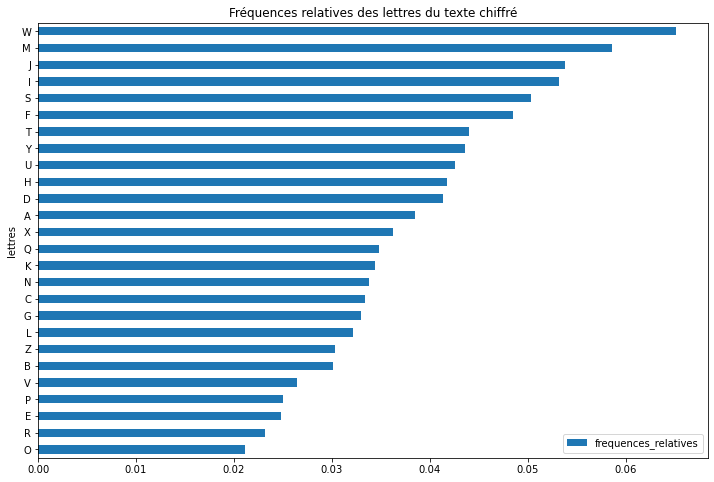

In [3]:
#importations des packages pour l'analyse fréquentielle
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt

text_file = open("page03_chiffree.txt")
message_chiffre = text_file.read()
text_file.close()
# convertir la chaine de caractère en liste avec chaque élément un caractère
lettres_liste = list(message_chiffre)

# fréquence de chaque lettre
lettres_freq = Counter(lettres_liste)

# convertir lettres_freq dans un df pandas 
df = pd.DataFrame.from_dict(lettres_freq, orient='index').reset_index()
df = df.rename(columns={'index':'lettres', 0:'frequences'})

# garder les 26 lettres
df = df.loc[df['lettres'].isin(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])]

df['frequences_relatives']=df['frequences']/df['frequences'].sum()
df = df.sort_values('frequences_relatives')

# charger la fréquence des lettres dans une langue dans un csv
#fr_freq = pd.read_csv("frequences.csv")
#df = pd.merge(df,fr_freq, on="lettres")
# frequence attendue
#df['freq_attendue'] = np.round(df['frequences_relatives']*df['frequences'].sum(),0)

#figure de la fréquence des lettres du texte
df.plot(x="lettres", y="frequences_relatives",title="Fréquences relatives des lettres du texte chiffré", kind="barh", figsize=(12,8))

#texte_chiffre=chiffrement(file_content,19)
#print(file_content)
#print(dechiffrement(texte_chiffre,19))
#with open('page01_chiffree.txt', 'w') as f:
#    f.write(texte_chiffre)

## Exercice 3

Le contenu de page03_chiffree.txt a été chargé dans la variable message_chiffree. On sait que message_chiffree a été chiffré avec le code de Vigenere en utilisant comme clé le titre en français de l'un des romans de Harry Potter. Dechiffrer le texte.

Utiliser la cellule ci-dessous pour résoudre l'exercice :

In [ ]:
#texte a chiffrer
text_file = open("page03_chiffree.txt")
message_chiffre = text_file.read()
text_file.close()
print(message_chiffre)